In [1]:
# 필요한 라이브러리를 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\takea\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Excel 파일을 읽어 데이터프레임으로 저장
data = pd.read_excel(r'C:\Users\takea\Desktop\DeepLearning\datasets\week2\Raisin_Dataset\Raisin_Dataset.xlsx', 
        sheet_name='Raisin_Grains_Dataset')
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [3]:
# 데이터프레임을 숫자로 변경
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Class'] = label.fit_transform(data['Class'])

### 데이터타입, 결측값, 컬럼 확인

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [6]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

### EDA 수행

Text(0.5, 1.0, 'Label')

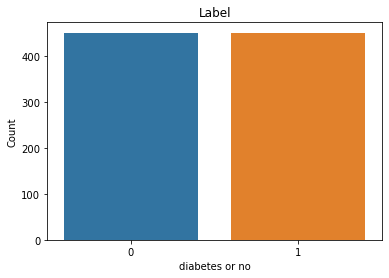

In [7]:
sns.countplot(data = data, x="Class")
plt.xlabel("diabetes or no")
plt.ylabel("Count")
plt.title("Label")

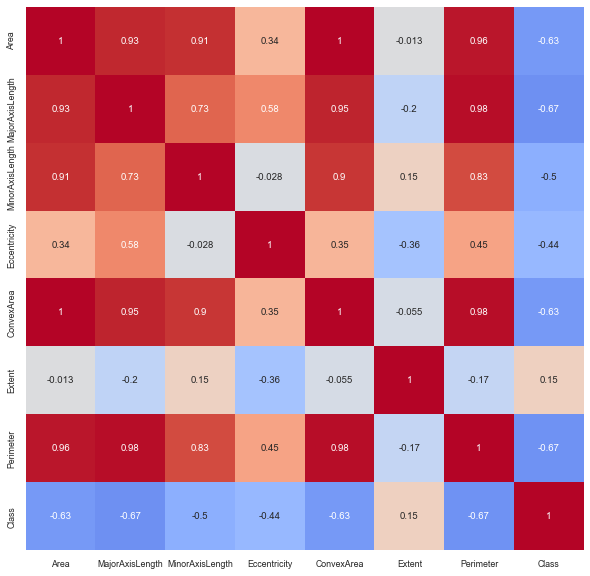

In [8]:
df_corr = data.astype(float).corr()
colormap = plt.cm.coolwarm
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap=colormap, vmin=-1., vmax=1.)
plt.show()

In [9]:
# 일부 열을 삭제
data.drop(columns=['Area', 'MajorAxisLength', 'ConvexArea', 'Perimeter'], inplace=True)

In [16]:
data.columns

Index(['MinorAxisLength', 'Eccentricity', 'Extent', 'Class'], dtype='object')

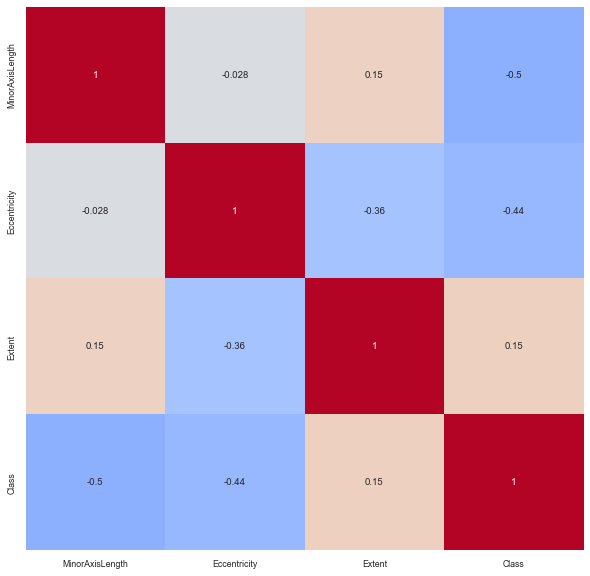

In [10]:
df_corr = data.astype(float).corr()
colormap = plt.cm.coolwarm
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap=colormap, vmin=-1., vmax=1.)
plt.show()

In [15]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 데이터 준비
X = data.iloc[:, 0:3].values  # 입력 특성 데이터
y = data.iloc[:, 3].values  # 출력(레이블) 데이터

# LabelEncoder를 사용하여 문자열 레이블을 숫자로 변환
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# OneHotEncoder를 사용하여 출력 데이터를 원-핫 인코딩
onehot_encoder = OneHotEncoder(sparse=False)
Y = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# KFold를 사용하여 5-겹 교차 검증 수행
# 80%의 데이터를 훈련 데이터셋에, 20%의 데이터를 테스트 데이터셋에 사용
kf = KFold(n_splits=5, random_state=0, shuffle=True)

#
modelList = []
model_historyList = []
y_test_classList = []
y_pred_classList = []

# 필요한 Keras 레이어를 가져옴
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    # 이제 X_train, X_test, y_train, y_test를 사용하여 모델을 훈련하고 평가할 수 있습니다.
    # 각 반복마다 다른 데이터 세트를 사용하여 모델을 평가하게 됩니다.
    # 모델 훈련 및 평가
    model = Sequential()

    # 1D 합성곱 레이어 (Conv1D) 추가
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(3, 1)))

    # 맥스 풀링 레이어 추가
    model.add(MaxPooling1D(pool_size=1))

    # LSTM 레이어 추가
    model.add(LSTM(50, activation='relu', input_shape=(3, 1)))

    # Flatten 레이어 추가
    model.add(Flatten())

    # 출력 레이어 추가
    model.add(Dense(2, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    modelList.append(model)
    
    # 데이터를 1D CNN 입력 형태에 맞게 재구성
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # 모델 학습
    model_historyList.append(model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)))
    y_pred = model.predict(X_test)

    # 예측 결과를 클래스로 변환
    y_test_classList.append(np.argmax(y_test,axis=1))
    y_pred_classList.append(np.argmax(y_pred,axis=1))

Epoch 1/100
23/23 [==============================] - 3s 19ms/step - loss: 0.7915 - accuracy: 0.5542 - val_loss: 0.5753 - val_accuracy: 0.6833
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6052 - accuracy: 0.6694 - val_loss: 0.6249 - val_accuracy: 0.6444
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5740 - accuracy: 0.6986 - val_loss: 0.5241 - val_accuracy: 0.7389
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5643 - accuracy: 0.6958 - val_loss: 0.5065 - val_accuracy: 0.7389
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5568 - accuracy: 0.7167 - val_loss: 0.5118 - val_accuracy: 0.7500
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5683 - accuracy: 0.7111 - val_loss: 0.5334 - val_accuracy: 0.7500
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5580 - accuracy: 0.7125 - val_loss: 0.4967 - val_accuracy: 0.7722
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4403 - accuracy: 0.8111 - val_loss: 0.4398 - val_accuracy: 0.7944
Epoch 60/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4002 - accuracy: 0.8208 - val_loss: 0.4071 - val_accuracy: 0.8167
Epoch 61/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4292 - accuracy: 0.8167 - val_loss: 0.4136 - val_accuracy: 0.8222
Epoch 62/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4108 - accuracy: 0.8264 - val_loss: 0.3748 - val_accuracy: 0.8667
Epoch 63/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3915 - accuracy: 0.8403 - val_loss: 0.3783 - val_accuracy: 0.8722
Epoch 64/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3933 - accuracy: 0.8319 - val_loss: 0.3844 - val_accuracy: 0.8500
Epoch 65/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3918 - accuracy: 0.8444 - val_loss: 0.3619 - val_accuracy: 0.8722
Epoch 

Epoch 74/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3618 - accuracy: 0.8542 - val_loss: 0.5002 - val_accuracy: 0.7944
Epoch 75/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3591 - accuracy: 0.8500 - val_loss: 0.4741 - val_accuracy: 0.8000
Epoch 76/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3633 - accuracy: 0.8736 - val_loss: 0.4914 - val_accuracy: 0.7889
Epoch 77/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3612 - accuracy: 0.8431 - val_loss: 0.4755 - val_accuracy: 0.7889
Epoch 78/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3726 - accuracy: 0.8444 - val_loss: 0.4942 - val_accuracy: 0.7833
Epoch 79/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3663 - accuracy: 0.8653 - val_loss: 0.4736 - val_accuracy: 0.7889
Epoch 80/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3697 - accuracy: 0.8458 - val_loss: 0.4637 - val_accuracy: 0.8000
Epoch 

Epoch 89/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4012 - accuracy: 0.8306 - val_loss: 0.3663 - val_accuracy: 0.8444
Epoch 90/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4017 - accuracy: 0.8194 - val_loss: 0.3201 - val_accuracy: 0.8833
Epoch 91/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3949 - accuracy: 0.8361 - val_loss: 0.3569 - val_accuracy: 0.8556
Epoch 92/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4182 - accuracy: 0.8153 - val_loss: 0.3237 - val_accuracy: 0.8944
Epoch 93/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4068 - accuracy: 0.8361 - val_loss: 0.3207 - val_accuracy: 0.9000
Epoch 94/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4016 - accuracy: 0.8347 - val_loss: 0.3254 - val_accuracy: 0.8944
Epoch 95/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4096 - accuracy: 0.8222 - val_loss: 0.3516 - val_accuracy: 0.8667
Epoch 

23/23 [==============================] - 0s 6ms/step - loss: 0.5394 - accuracy: 0.7236 - val_loss: 0.5717 - val_accuracy: 0.7000
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5293 - accuracy: 0.7403 - val_loss: 0.5583 - val_accuracy: 0.7056
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5226 - accuracy: 0.7444 - val_loss: 0.5753 - val_accuracy: 0.7056
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5225 - accuracy: 0.7278 - val_loss: 0.6115 - val_accuracy: 0.6667
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5355 - accuracy: 0.7264 - val_loss: 0.5549 - val_accuracy: 0.7444
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5338 - accuracy: 0.7403 - val_loss: 0.5357 - val_accuracy: 0.7389
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5065 - accuracy: 0.7403 - val_loss: 0.5308 - val_accuracy: 0.7444
Epoch 10/100
23/23 [=====

Epoch 61/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3966 - accuracy: 0.8333 - val_loss: 0.3531 - val_accuracy: 0.8667
Epoch 62/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.8347 - val_loss: 0.3536 - val_accuracy: 0.8667
Epoch 63/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4056 - accuracy: 0.8111 - val_loss: 0.4230 - val_accuracy: 0.7889
Epoch 64/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4136 - accuracy: 0.8194 - val_loss: 0.3549 - val_accuracy: 0.8667
Epoch 65/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4448 - accuracy: 0.8139 - val_loss: 0.3639 - val_accuracy: 0.8611
Epoch 66/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3950 - accuracy: 0.8431 - val_loss: 0.3593 - val_accuracy: 0.8611
Epoch 67/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4077 - accuracy: 0.8236 - val_loss: 0.3690 - val_accuracy: 0.8278
Epoch 

In [17]:
for i in range(5):
    modelList[i].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 2, 64)             192       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 2, 64)             0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 50)                23000     
                                                                 
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 23294 (90.99 KB)
Trainable params: 23294 (90.99 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

sequential_0


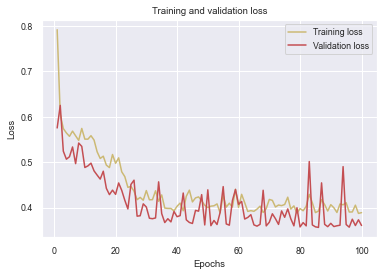

sequential_1


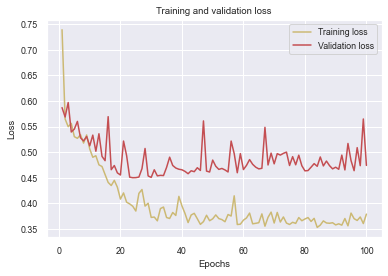

sequential_2


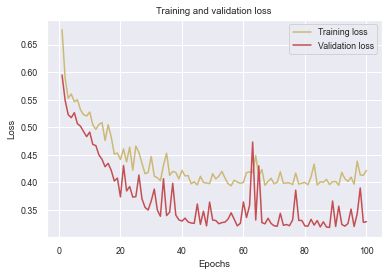

sequential_3


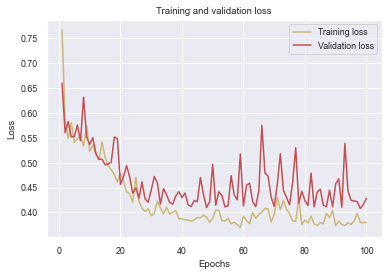

sequential_4


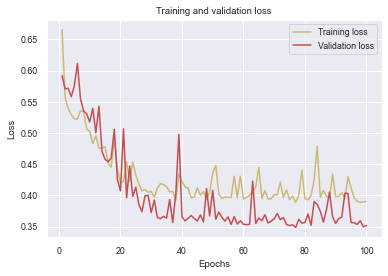

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(5):
    print(f"sequential_{i}")
    loss = model_historyList[i].history['loss']
    val_loss = model_historyList[i].history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

sequential_0


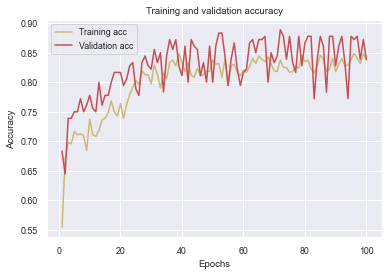

sequential_1


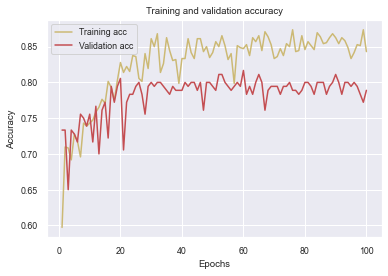

sequential_2


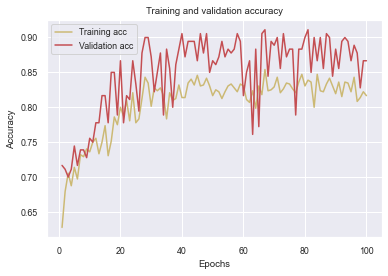

sequential_3


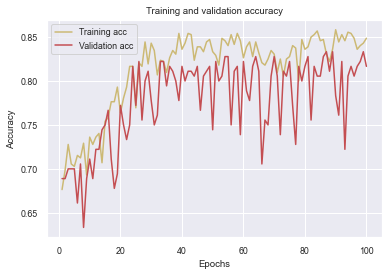

sequential_4


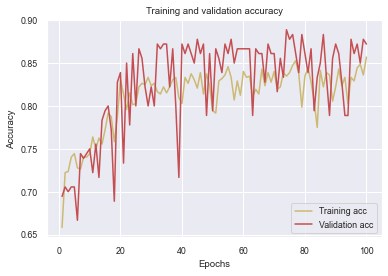

In [19]:
for i in range(5):
    print(f"sequential_{i}")
    acc = model_historyList[i].history['accuracy']
    val_acc = model_historyList[i].history['val_accuracy']
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [20]:
# 예측 결과를 평가
from sklearn.metrics import classification_report,confusion_matrix
for i in range(5):
    print(f"sequential_{i}")
    print(classification_report(y_test_classList[i], y_pred_classList[i]))
    print(confusion_matrix(y_test_classList[i], y_pred_classList[i]))
    print("\n")

sequential_0
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        97
           1       0.88      0.76      0.81        83

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.84       180
weighted avg       0.84      0.84      0.84       180

[[88  9]
 [20 63]]


sequential_1
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        84
           1       0.82      0.77      0.80        96

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180

[[68 16]
 [22 74]]


sequential_2
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        87
           1       0.89      0.85      0.87        93

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87    